In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
# Suppress warnings
warnings.filterwarnings("ignore", category=Warning)


# Load dataset
#df = pd.read_excel("Monday Prices.xlsx")

In [2]:
# Load dataset
df = pd.read_csv("aapl_scaled.csv")

In [3]:
df.head()

,Date,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow
0,2000-01-03,1,-0.671968,-0.672324,-0.672963,-0.673016,0.393194,-0.672426,-0.671968,0.0,-2.842171e-14,-5.684342e-14,-0.673419,-0.673757,0.741042,-0.182205,-0.196298,0.005582,-0.673222
1,2000-01-04,3,-0.673132,-0.672551,-0.673029,-0.672605,0.332136,-0.672918,-0.673132,0.0,-2.842171e-14,-5.684342e-14,-0.673335,-0.673723,-0.186780,-0.182942,-0.196298,0.003174,-0.673042
2,2000-01-05,4,-0.672952,-0.672551,-0.672797,-0.673163,1.025500,-0.672787,-0.672952,0.0,-2.842171e-14,-5.684342e-14,-0.673268,-0.673673,-0.073428,-0.182942,-0.196298,0.003174,-0.674139
3,2000-01-06,2,-0.674050,-0.672989,-0.673791,-0.672868,0.998519,-0.673623,-0.674050,0.0,-2.842171e-14,-5.684342e-14,-0.673218,-0.673673,-0.766005,-0.187362,-0.197871,-0.006458,-0.673599
4,2000-01-07,0,-0.673509,-0.673720,-0.673742,-0.674049,0.197493,-0.673673,-0.673509,0.0,-2.842171e-14,-5.684342e-14,-0.673167,-0.673656,-0.416792,-0.188835,-0.198657,-0.008866,-0.673812


In [4]:
import pandas as pd  

# Convert 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])  

# Get the last 5 years from today
five_years_ago = pd.Timestamp.today() - pd.DateOffset(years=5)  

# Filter data
df = df[df['Date'] >= five_years_ago]

In [5]:
df.head().T

,5086,5087,5088,5089,5090
Date,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00
Day,1,3,4,2,0
Close,0.207589,0.297205,0.291796,0.343242,0.30063
High,0.215262,0.290957,0.33262,0.334308,0.323235
Low,0.170034,0.25732,0.297576,0.305859,0.308642
Open,0.223147,0.256158,0.313516,0.29665,0.32149
Volume,-0.125749,-0.254078,-0.212179,-0.346487,-0.471294
VWAP,0.197786,0.28195,0.307446,0.327909,0.31089
Adjusted_Close,0.207589,0.297205,0.291796,0.343242,0.30063
Market_Cap,0.0,0.0,0.0,0.0,0.0


In [6]:
print(len(df.columns))

19


In [7]:
# 1. Basic Information
print("\nDataset Information:\n")
print(df.info())

# 2. Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 5086 to 6306
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1221 non-null   datetime64[ns]
 1   Day             1221 non-null   int64         
 2   Close           1221 non-null   float64       
 3   High            1221 non-null   float64       
 4   Low             1221 non-null   float64       
 5   Open            1221 non-null   float64       
 6   Volume          1221 non-null   float64       
 7   VWAP            1221 non-null   float64       
 8   Adjusted_Close  1221 non-null   float64       
 9   Market_Cap      1221 non-null   float64       
 10  Bid_Date        1221 non-null   float64       
 11  Ask_Date        1221 non-null   float64       
 12  SMA_50          1221 non-null   float64       
 13  EMA_50          1221 non-null   float64       
 14  RSI             1221 non-null   flo

In [8]:
# 4. Checking for Duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [9]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

<Axes: xlabel='Date'>

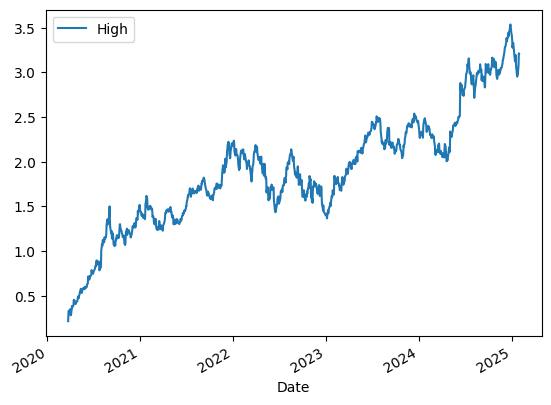

In [10]:
df.plot.line(y="High", use_index=True, x='Date')

In [11]:
df = df.dropna()  # Drop rows with NaN values

In [12]:
print(df.columns)

Index(['Date', 'Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow'],
      dtype='object')


In [13]:
import pandas as pd

# Lag Features
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)
df['RSI_Lag1'] = df['RSI'].shift(1)
df['MACD_Lag1'] = df['MACD'].shift(1)

# Rolling Statistics
df['Rolling_Mean_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Close'].rolling(window=7).std()
df['Rolling_Mean_30'] = df['Close'].rolling(window=30).mean()
df['Rolling_Std_30'] = df['Close'].rolling(window=30).std()

# Price Change Indicators
df['Daily_Return'] = df['Close'].pct_change()
df['High_Low_Percent'] = (df['High'] - df['Low']) / df['Low'] * 100
df['Open_Close_Diff'] = df['Close'] - df['Open']

# Moving Averages
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()

# ATR Calculation (Fixed)
df['Close_Shift1'] = df['Close'].shift(1)
df['ATR'] = df.apply(lambda x: max(x['High'] - x['Low'], 
                                   abs(x['High'] - x['Close_Shift1']), 
                                   abs(x['Low'] - x['Close_Shift1'])), axis=1)
df.drop(columns=['Close_Shift1'], inplace=True)

# Volume-Related Features
df['Volume_SMA_7'] = df['Volume'].rolling(window=7).mean()
df['Volume_Ratio'] = df['Volume'] / df['Volume_SMA_7']

# Time-Based Features
df['Bid_Date'] = pd.to_datetime(df['Bid_Date'])  # Ensure Date is in datetime format
df['Day_of_Week'] = df['Bid_Date'].dt.dayofweek
df['Month'] = df['Bid_Date'].dt.month
df['Year'] = df['Bid_Date'].dt.year

# Stochastic Oscillator
df['Stochastic_Oscillator'] = (df['Close'] - df['Low'].rolling(window=14).min()) / (df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min())

# Z-Score Normalization (Fixed)
df['Close_ZScore'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()

# Handle NaN values
#df.dropna(inplace=True)  # OR df.fillna(0, inplace=True)

In [14]:
df.tail().T

,6302,6303,6304,6305,6306
Date,2025-01-23 00:00:00,2025-01-24 00:00:00,2025-01-27 00:00:00,2025-01-28 00:00:00,2025-01-29 00:00:00
Day,2,0,1,3,4
Close,2.979816,2.965393,3.081429,3.219098,3.237126
High,3.000103,2.977372,3.083234,3.213775,3.208417
Low,2.996981,2.982237,3.024811,3.137958,3.190969
Open,3.001314,3.001971,2.989501,3.101561,3.155211
Volume,-0.846681,-0.861116,-0.756398,-0.80634,-0.885421
VWAP,2.992378,2.975047,3.063424,3.190612,3.212305
Adjusted_Close,2.979816,2.965393,3.081429,3.219098,3.237126
Market_Cap,0.0,0.0,0.0,0.0,0.0


In [15]:
print(df.columns)

Index(['Date', 'Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow',
       'Close_Lag1', 'Close_Lag2', 'Close_Lag3', 'RSI_Lag1', 'MACD_Lag1',
       'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_30', 'Rolling_Std_30',
       'Daily_Return', 'High_Low_Percent', 'Open_Close_Diff', 'SMA_200',
       'EMA_100', 'ATR', 'Volume_SMA_7', 'Volume_Ratio', 'Day_of_Week',
       'Month', 'Year', 'Stochastic_Oscillator', 'Close_ZScore'],
      dtype='object')


In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The data is non-stationary; consider differencing.")
else:
    print("The data is stationary.")

ADF Statistic: -1.5177490508255802
p-value: 0.524713580981408
The data is non-stationary; consider differencing.


In [17]:
df['High_Diff1'] = df['High'] - df['High'].shift(1)  # First-order differencing

In [18]:
df['High_Log'] = np.log(df['High'])

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# First-order differencing
df['High_Diff1'] = df['High'] - df['High'].shift(1)

# ADF test after first-order differencing
result_diff1 = adfuller(df['High_Diff1'].dropna())
print('ADF Statistic (Diff1):', result_diff1[0])
print('p-value (Diff1):', result_diff1[1])

if result_diff1[1] > 0.05:
    print("Still non-stationary, apply second differencing.")
else:
    print("Now the data is stationary.")

ADF Statistic (Diff1): -24.370987128755964
p-value (Diff1): 0.0
Now the data is stationary.


In [20]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [21]:
# Handle NaN values
df.dropna(inplace=True)  

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Ensure the index is datetime
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df.set_index('Date', inplace=True)       # Set Date as index

# Drop NaNs and align indices
df = df.dropna(subset=['High_Diff1', 'RSI', 'MACD', 'Volume'])

# Select features (Removing SMA_50 as it was not significant)
exog_features = df[['RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR', 
                     'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']]

# Normalize exogenous features
scaler = StandardScaler()
exog_features_scaled = pd.DataFrame(scaler.fit_transform(exog_features), 
                                    columns=exog_features.columns, 
                                    index=exog_features.index)

# Define the target variable
target = df['High_Diff1']

# Ensure indices are aligned
exog_features_scaled = exog_features_scaled.loc[target.index]

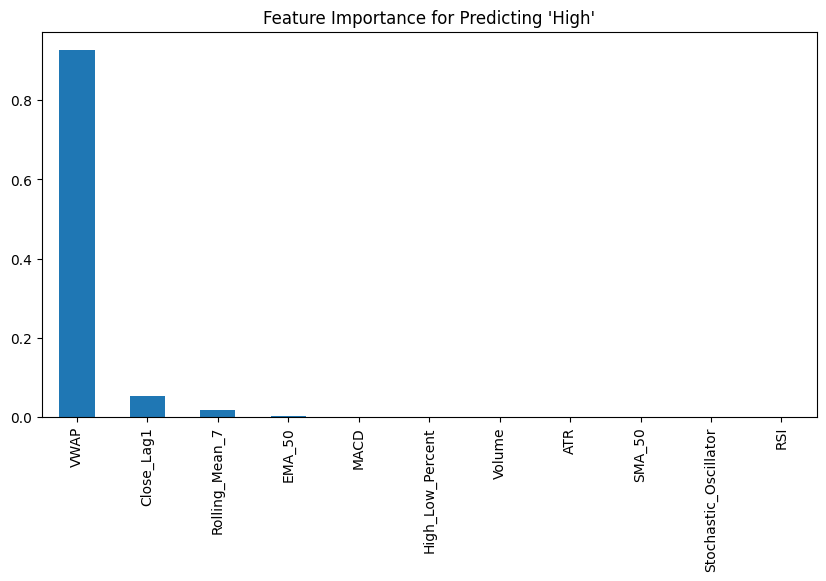

In [23]:
selected_features = ['RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR', 
                     'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(exog_features_scaled, df['High'])

importances = pd.Series(rf.feature_importances_, index=selected_features)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance for Predicting 'High'")
plt.show()


In [24]:
corr_matrix = df[['High', 'RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR', 
                  'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']].corr()
print(corr_matrix)

                           High       RSI      MACD    Volume      VWAP  \
High                   1.000000  0.245529  0.357830 -0.432841  0.999598   
RSI                    0.245529  1.000000  0.825612 -0.161902  0.253600   
MACD                   0.357830  0.825612  1.000000 -0.174992  0.361723   
Volume                -0.432841 -0.161902 -0.174992  1.000000 -0.447231   
VWAP                   0.999598  0.253600  0.361723 -0.447231  1.000000   
SMA_50                 0.950923 -0.025875  0.062839 -0.423026  0.949787   
EMA_50                 0.967357  0.018295  0.124981 -0.431199  0.966320   
ATR                    0.130668 -0.103822 -0.087510  0.393513  0.115030   
Stochastic_Oscillator  0.154365  0.840730  0.522037 -0.153064  0.163504   
Close_Lag1             0.997866  0.230332  0.357708 -0.445953  0.997651   
Rolling_Mean_7         0.994759  0.181857  0.331521 -0.440887  0.994447   
High_Low_Percent      -0.197853 -0.264948 -0.256528  0.636397 -0.221653   

                        

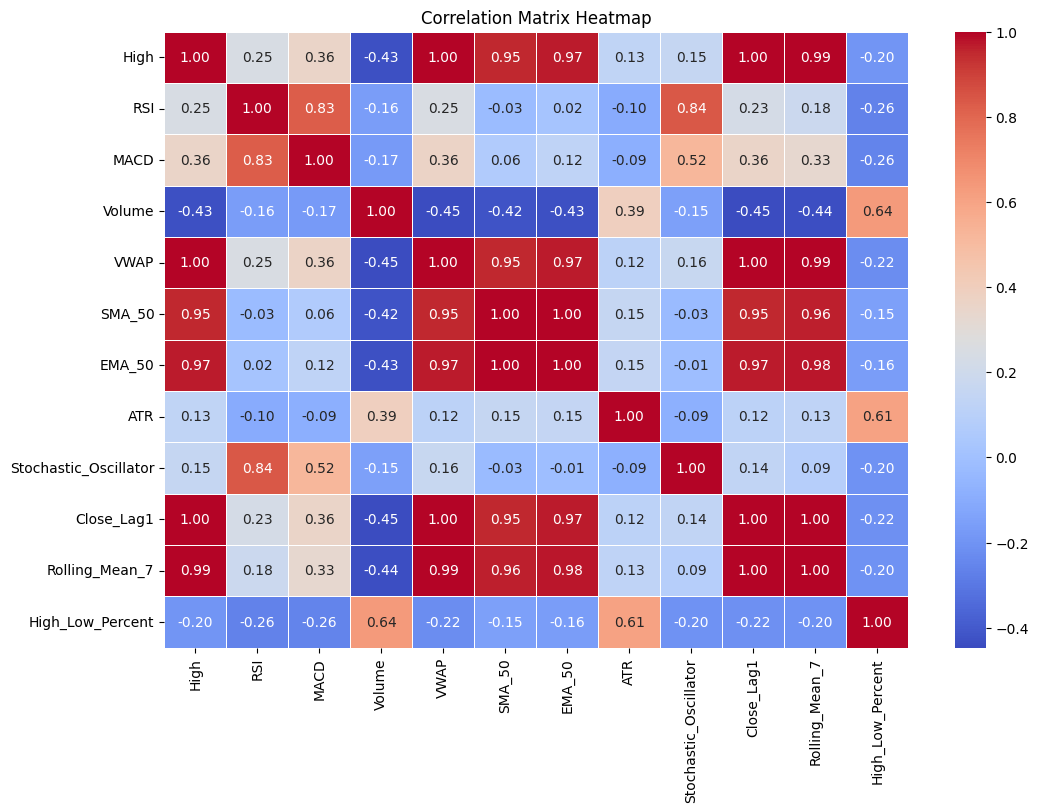

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the selected columns
corr_matrix = df[['High', 'RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR', 
                  'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [26]:
import pandas as pd

# Compute correlation matrix including the target variable
corr_matrix = df[['High', 'RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR', 
                  'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']].corr()

# Get absolute correlation with the target variable 'High'
target_corr = corr_matrix['High'].abs().sort_values(ascending=False)

# Select top 8 features (excluding 'High' itself)
top_features = target_corr.index[1:9]  # Skip index 0 as it's 'High' itself

# Print the filtered correlation matrix for the selected features
filtered_corr_matrix = corr_matrix.loc[top_features, top_features]

# Round values to 3 decimal places for better readability
filtered_corr_matrix = filtered_corr_matrix.round(3)

# Print in a formatted table
print("Filtered Correlation Matrix (Top 8 Features Related to 'High'):\n")
print(filtered_corr_matrix.to_string())

Filtered Correlation Matrix (Top 8 Features Related to 'High'):

                 VWAP  Close_Lag1  Rolling_Mean_7  EMA_50  SMA_50  Volume   MACD    RSI
VWAP            1.000       0.998           0.994   0.966   0.950  -0.447  0.362  0.254
Close_Lag1      0.998       1.000           0.996   0.968   0.952  -0.446  0.358  0.230
Rolling_Mean_7  0.994       0.996           1.000   0.976   0.961  -0.441  0.332  0.182
EMA_50          0.966       0.968           0.976   1.000   0.997  -0.431  0.125  0.018
SMA_50          0.950       0.952           0.961   0.997   1.000  -0.423  0.063 -0.026
Volume         -0.447      -0.446          -0.441  -0.431  -0.423   1.000 -0.175 -0.162
MACD            0.362       0.358           0.332   0.125   0.063  -0.175  1.000  0.826
RSI             0.254       0.230           0.182   0.018  -0.026  -0.162  0.826  1.000


In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# exogenous features 
exog_features_scaled = df[['RSI', 'MACD','Volume', 'VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR', 'Stochastic_Oscillator']]

# Normalize the exogenous features
scaler = StandardScaler()
exog_features_scaled = pd.DataFrame(scaler.fit_transform(exog_features_scaled), 
                                    columns=exog_features_scaled.columns, 
                                    index=exog_features_scaled.index)

# Define the target variable
target = df['High_Diff1']

# Train the ARIMAX model (ARIMA with exogenous variables)
model = ARIMA(target,  
              order=(2, 1, 2),  # Adjust (p, d, q) as needed
              exog=exog_features_scaled,  
              enforce_stationarity=False, 
              enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the summary of the results
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             High_Diff1   No. Observations:                 1022
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2446.558
Date:                Thu, 20 Mar 2025   AIC                          -4867.117
Time:                        00:08:22   BIC                          -4803.084
Sample:                             0   HQIC                         -4842.801
                               - 1022                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
RSI                       0.0052      0.003      1.953      0.051   -1.89e-05       0.010
MACD                     -0.0061      0.002     -3.596      0.000      -0.009      -0.003
Volume  

#### Key Insights:

- Significant Features:

VWAP   
Close_Lag1   
Rolling_Mean_7  
ATR   

- Non-Significant Features:

RSI   
MACD   
Volume  
Stochastic Oscillator   

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = results.predict(start=len(target) - 30, end=len(target) - 1, exog=exog_features.iloc[-30:])
y_true = target.iloc[-30:]  # Actual values for test set

# Train set predictions (using fitted values)
y_train_pred = results.fittedvalues  # Predicted values for the training data
y_train_true = target.iloc[:len(y_train_pred)]  # Actual values for the training set

# Evaluation metrics for the test set
mae_test = mean_absolute_error(y_true, y_pred)
mse_test = mean_squared_error(y_true, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true, y_pred)

# Evaluation metrics for the train set
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mse_train = mean_squared_error(y_train_true, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_true, y_train_pred)

# Print evaluation metrics
print(f"Test Metrics:")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

print(f"\nTrain Metrics:")
print(f"Train MAE: {mae_train:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train R-squared: {r2_train:.4f}")

Test Metrics:
Test MAE: 0.0257
Test MSE: 0.0011
Test RMSE: 0.0335
Test R-squared: 0.6703

Train Metrics:
Train MAE: 0.0164
Train MSE: 0.0005
Train RMSE: 0.0221
Train R-squared: 0.7013


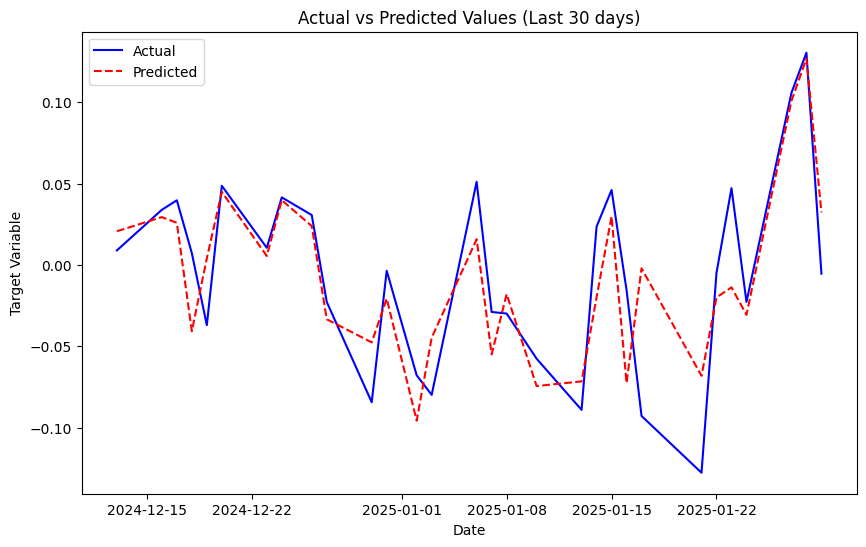

In [30]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(target.index[-30:], y_true, label='Actual', color='blue')
plt.plot(target.index[-30:], y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Last 30 days)')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

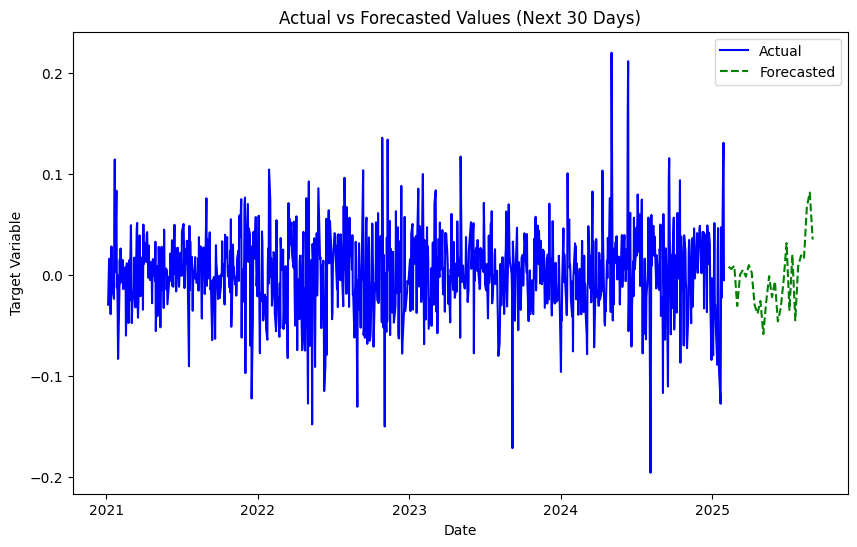

In [31]:
# Subset the exogenous features to match the 8 features used in training
exog_features_scaled = df[['RSI', 'MACD', 'Volume', 'VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR', 'Stochastic_Oscillator']]

# Ensure you're selecting the most recent 30 rows for forecasting
exog_forecast = exog_features_scaled.iloc[-30:, :]

# Forecasting the next 30 days
y_pred_future = results.predict(start=len(target), end=len(target) + 29, exog=exog_forecast)

# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(target.index, target, label='Actual', color='blue')
plt.plot(pd.date_range(target.index[-1], periods=31, freq='W')[1:], y_pred_future, label='Forecasted', color='green', linestyle='--')
plt.title('Actual vs Forecasted Values (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [32]:
#hypertuning 

In [33]:
# Subset only significant exogenous features
exog_features_tune = df[['VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR']]

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error

# Define parameter grid for p, d, q
param_grid = {
    'p': [0, 1, 2, 3],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Set the target variable and exogenous features
y = target  # The target variable (e.g., High_Diff1)
X = exog_features_tune  # The significant exogenous features

# Loop through the parameter grid to fit ARIMAX models
best_aic = float('inf')
best_order = None
best_model = None

for params in ParameterGrid(param_grid):
    try:
        # Fit ARIMA model with the given (p, d, q)
        model = ARIMA(y, order=(params['p'], params['d'], params['q']), exog=X)
        results = model.fit()
        
        # Compare AIC values to choose the best model
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = (params['p'], params['d'], params['q'])
            best_model = results
    except Exception as e:
        print(f"Error with parameters {params}: {e}")

# Output the best model
print(f"Best ARIMAX Model Order: {best_order}")
print(f"Best AIC: {best_aic}")

Best ARIMAX Model Order: (1, 0, 1)
Best AIC: -5015.327569287688


In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Use the exogenous features you selected earlier
exog_features_scaled = df[['VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR']]  # Only significant features

# Normalize the exogenous features
scaler = StandardScaler()
exog_features_scaled = pd.DataFrame(scaler.fit_transform(exog_features_scaled), 
                                    columns=exog_features_scaled.columns, 
                                    index=exog_features_scaled.index)

# Define the target variable
target = df['High_Diff1']

# Train the ARIMAX model with the best order (1, 0, 1)
model = ARIMA(target,  
              order=(1, 0, 1),  # Best model order
              exog=exog_features_scaled)  # Exogenous features
results = model.fit()

arimax_result = results

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             High_Diff1   No. Observations:                 1022
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2515.652
Date:                Thu, 20 Mar 2025   AIC                          -5015.303
Time:                        00:09:16   BIC                          -4975.867
Sample:                             0   HQIC                         -5000.331
                               - 1022                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.000      5.049      0.000       0.001       0.002
VWAP               0.5011      0.007     75.446      0.000       0.488       0.514
Close_Lag1        -0.4194      0.009

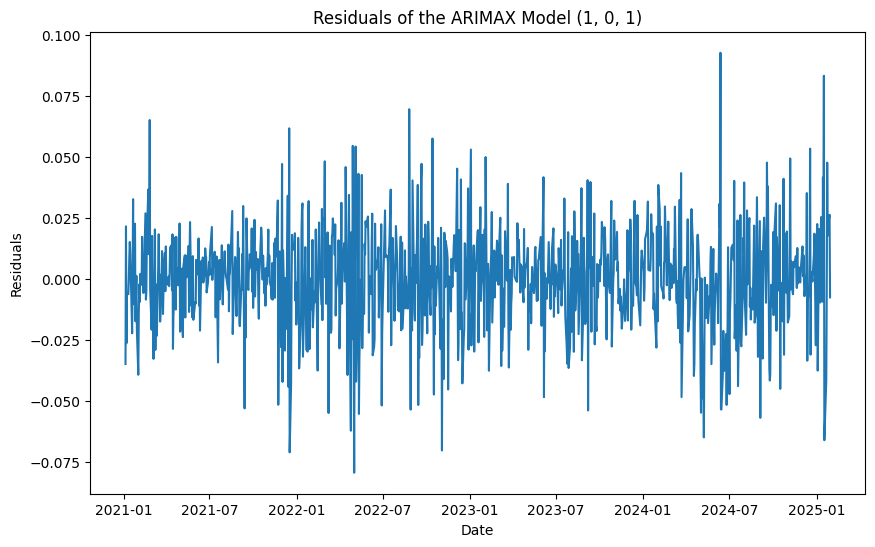

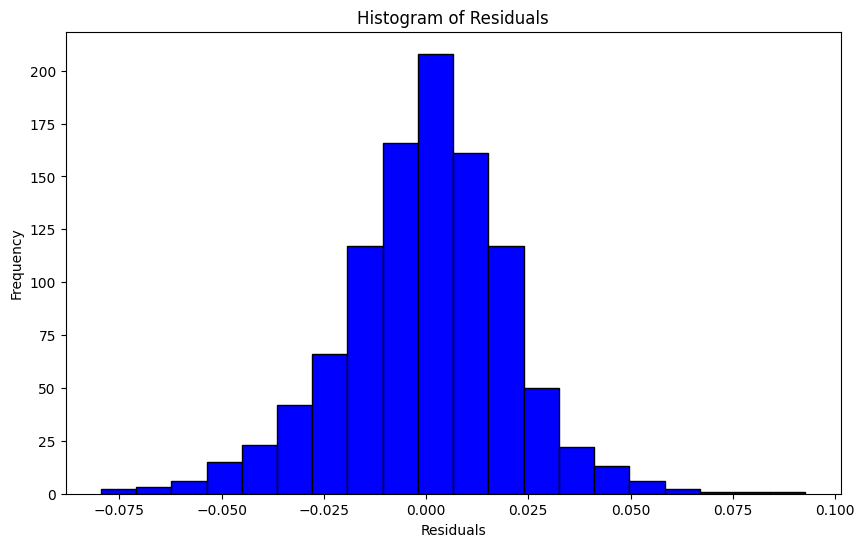

Ljung-Box Test for Autocorrelation:
      lb_stat  lb_pvalue
10  6.834023   0.741016
Jarque-Bera Test Statistic: 73.69597842537856, p-value: 9.933941901412707e-17


In [36]:
import matplotlib.pyplot as plt

# Extract residuals
residuals = results.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMAX Model (1, 0, 1)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Ljung-Box Test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test for Autocorrelation:\n", ljung_box_test)

# Jarque-Bera Test for normality
from scipy.stats import jarque_bera
jb_test = jarque_bera(residuals)
print(f"Jarque-Bera Test Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Forecasting the next 30 days (test period)
y_pred_future = results.predict(start=len(target), end=len(target) + 29, exog=exog_features_scaled.iloc[-30:])
y_true = target.iloc[-30:]  # Actual values for the forecasted period (test)

# Train set predictions (using fitted values)
y_train_pred = results.fittedvalues  # Predicted values for the training data
y_train_true = target.iloc[:len(y_train_pred)]  # Actual values for the training set

# Calculate accuracy metrics for the test set (forecasted period)
mae_test = mean_absolute_error(y_true, y_pred_future)
mse_test = mean_squared_error(y_true, y_pred_future)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true, y_pred_future)

# Calculate accuracy metrics for the train set
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mse_train = mean_squared_error(y_train_true, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_true, y_train_pred)

# Print evaluation metrics for test and train
print(f"Test Metrics (for forecasted period):")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

print(f"\nTrain Metrics (for training data):")
print(f"Train MAE: {mae_train:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train R-squared: {r2_train:.4f}")

Test Metrics (for forecasted period):
Test MAE: 0.0259
Test MSE: 0.0012
Test RMSE: 0.0353
Test R-squared: 0.6327

Train Metrics (for training data):
Train MAE: 0.0156
Train MSE: 0.0004
Train RMSE: 0.0206
Train R-squared: 0.7403


In [39]:
import numpy as np

# Log-transform the target variable and exogenous features (only if they are positive values)
df['log_High_Diff1'] = np.log(df['High_Diff1'] + 1)  # Adding 1 to avoid log(0) if any values are zero
df['log_VWAP'] = np.log(df['VWAP'] + 1)
df['log_Close_Lag1'] = np.log(df['Close_Lag1'] + 1)
df['log_Rolling_Mean_7'] = np.log(df['Rolling_Mean_7'] + 1)
df['log_ATR'] = np.log(df['ATR'] + 1)

# Now define the new target variable (log-transformed) and exogenous features
target_log = df['log_High_Diff1']
exog_features_log = df[['log_VWAP', 'log_Close_Lag1', 'log_Rolling_Mean_7', 'log_ATR']]

# Normalize the exogenous features
scaler = StandardScaler()
exog_features_scaled_log = pd.DataFrame(scaler.fit_transform(exog_features_log), 
                                        columns=exog_features_log.columns, 
                                        index=exog_features_log.index)

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the target and exogenous features for SARIMAX
target_sarimax = target_log  # Use the log-transformed target
exog_sarimax = exog_features_scaled_log  # Use the log-transformed and scaled exogenous features

# Fit the SARIMAX model
sarimax_model = SARIMAX(target_sarimax, 
                       order=(1, 0, 1),  # ARIMAX order (p, d, q)
                       seasonal_order=(1, 0, 1, 12),  # Seasonal order (P, D, Q, s) assuming yearly seasonality
                       exog=exog_sarimax)  # Exogenous features
sarimax_results = sarimax_model.fit()

# Print the summary of the SARIMAX model
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     log_High_Diff1   No. Observations:                 1022
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                2448.640
Date:                            Thu, 20 Mar 2025   AIC                          -4879.280
Time:                                    00:09:24   BIC                          -4834.914
Sample:                                         0   HQIC                         -4862.435
                                           - 1022                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
log_VWAP               0.4719      0.007     68.038      0.000       0.458       0.486
log_Close_L

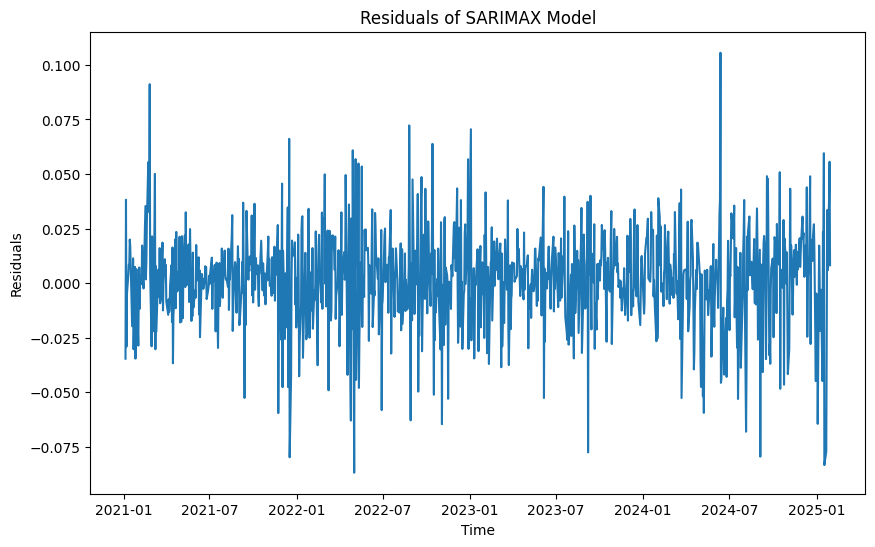

Ljung-Box Test for Autocorrelation:
     lb_stat  lb_pvalue
1   0.029817   0.862906
2   0.608804   0.737564
3   0.632791   0.888886
4   0.633019   0.959325
5   1.169426   0.947777
6   3.572109   0.734353
7   5.222564   0.632823
8   6.856313   0.552212
9   7.103810   0.626312
10  8.575349   0.572821
11  9.022462   0.619819
12  9.072581   0.696719
Jarque-Bera Test Statistic: 176.56405297498088, p-value: 4.566705917843945e-39


In [41]:
# Residuals of the SARIMAX model
residuals_sarimax = sarimax_results.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals_sarimax)
plt.title('Residuals of SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Ljung-Box Test for Autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(residuals_sarimax, lags=12)
print(f"Ljung-Box Test for Autocorrelation:\n{ljung_box_results}")

# Jarque-Bera Test for Normality
from scipy.stats import jarque_bera
jb_stat, jb_pvalue = jarque_bera(residuals_sarimax)
print(f"Jarque-Bera Test Statistic: {jb_stat}, p-value: {jb_pvalue}")


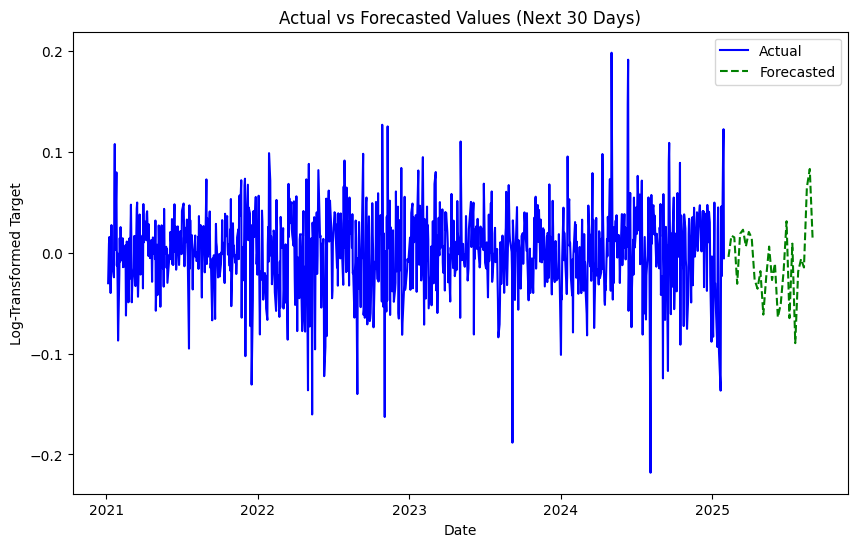

In [42]:
# Forecasting the next 30 days
forecast_steps = 30
y_pred_future = sarimax_results.predict(start=len(target_sarimax), 
                                        end=len(target_sarimax) + forecast_steps - 1, 
                                        exog=exog_features_scaled_log[-forecast_steps:])

# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(target_sarimax.index, target_sarimax, label='Actual', color='blue')
plt.plot(pd.date_range(target_sarimax.index[-1], periods=forecast_steps + 1, freq='W')[1:], y_pred_future, label='Forecasted', color='green', linestyle='--')
plt.title('Actual vs Forecasted Values (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Log-Transformed Target')
plt.legend()
plt.show()

Testing SARIMAX(0, 0, 0)x(0, 0, 0, 7)...
Testing SARIMAX(0, 0, 0)x(0, 0, 1, 7)...
Testing SARIMAX(0, 0, 0)x(0, 0, 2, 7)...
Testing SARIMAX(0, 0, 0)x(0, 1, 0, 7)...
Testing SARIMAX(0, 0, 0)x(0, 1, 1, 7)...
Testing SARIMAX(0, 0, 0)x(0, 1, 2, 7)...
Testing SARIMAX(0, 0, 0)x(1, 0, 0, 7)...
Testing SARIMAX(0, 0, 0)x(1, 0, 1, 7)...
Testing SARIMAX(0, 0, 0)x(1, 0, 2, 7)...
Testing SARIMAX(0, 0, 0)x(1, 1, 0, 7)...
Testing SARIMAX(0, 0, 0)x(1, 1, 1, 7)...
Testing SARIMAX(0, 0, 0)x(1, 1, 2, 7)...
Testing SARIMAX(0, 0, 1)x(0, 0, 0, 7)...
Testing SARIMAX(0, 0, 1)x(0, 0, 1, 7)...
Testing SARIMAX(0, 0, 1)x(0, 0, 2, 7)...
Testing SARIMAX(0, 0, 1)x(0, 1, 0, 7)...
Testing SARIMAX(0, 0, 1)x(0, 1, 1, 7)...
Testing SARIMAX(0, 0, 1)x(0, 1, 2, 7)...
Testing SARIMAX(0, 0, 1)x(1, 0, 0, 7)...
Testing SARIMAX(0, 0, 1)x(1, 0, 1, 7)...
Testing SARIMAX(0, 0, 1)x(1, 0, 2, 7)...
Testing SARIMAX(0, 0, 1)x(1, 1, 0, 7)...
Testing SARIMAX(0, 0, 1)x(1, 1, 1, 7)...
Testing SARIMAX(0, 0, 1)x(1, 1, 2, 7)...
Testing SARIMAX(

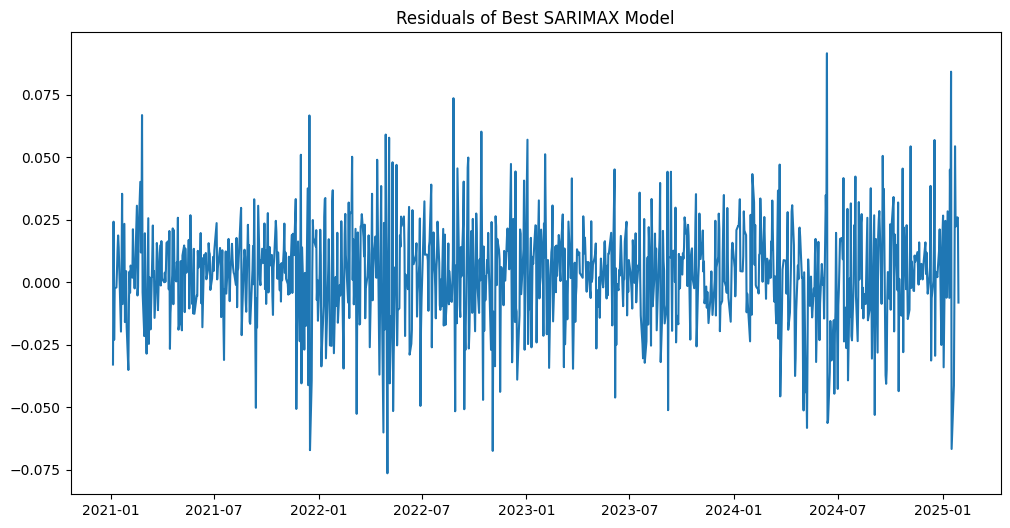

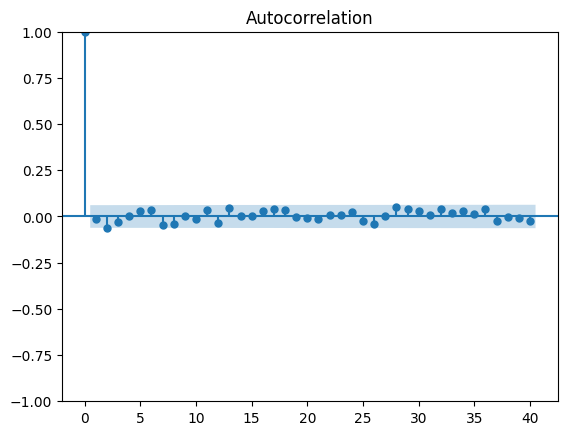

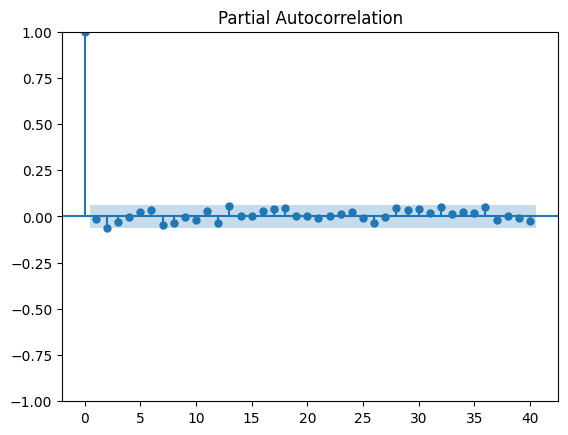

In [43]:
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the parameter grid for tuning
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
P_values = [0, 1]
D_values = [0, 1]
Q_values = [0, 1, 2]
s = 7  # Seasonal period (12 for monthly data with yearly seasonality)

# Generate all combinations of the hyperparameters
param_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

# Initialize variables to store the best model and its AIC
best_aic = np.inf
best_params = None
best_model = None

# Grid search
for params in param_grid:
    try:
        p, d, q, P, D, Q = params
        print(f"Testing SARIMAX({p}, {d}, {q})x({P}, {D}, {Q}, {s})...")
        
        # Fit SARIMAX model with current hyperparameters
        model = SARIMAX(target, 
                        order=(p, d, q), 
                        seasonal_order=(P, D, Q, s), 
                        exog=exog_features_scaled)
        result = model.fit(disp=False)
        
        # Check if the model's AIC is better than the previous best AIC
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = params
            best_model = result
        
    except Exception as e:
        print(f"Error with parameters {params}: {e}")
        continue

# Output the best parameters and AIC
print(f"Best AIC: {best_aic}")
print(f"Best parameters: {best_params}")

# Evaluate the best model
# Residual analysis
residuals = best_model.resid

# Plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of Best SARIMAX Model')
plt.show()

# Plot ACF and PACF of residuals to check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals, lags=40)
plot_pacf(residuals, lags=40)
plt.show()

In [50]:
# Fit the SARIMAX model using the best parameters (0, 1, 2, 0, 0, 0)
best_params = (0, 0, 1, 0, 0, 0)
s = 7  # Seasonal period (adjust based on your data characteristics)

# Re-fit the SARIMAX model
model = SARIMAX(target, 
                order=(best_params[0], best_params[1], best_params[2]), 
                seasonal_order=(best_params[3], best_params[4], best_params[5], s), 
                exog=exog_features_scaled)

# Fit the model
result = model.fit(disp=False)

sarimax_results = result

# Print the summary of the model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             High_Diff1   No. Observations:                 1022
Model:               SARIMAX(0, 0, 1)   Log Likelihood                2500.112
Date:                Thu, 20 Mar 2025   AIC                          -4988.223
Time:                        00:35:47   BIC                          -4958.646
Sample:                             0   HQIC                         -4976.994
                               - 1022                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
VWAP               0.5036      0.007     74.713      0.000       0.490       0.517
Close_Lag1        -0.4196      0.009    -45.782      0.000      -0.438      -0.402
Rolling_Mean_7    -0.0835      0.004

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Extract future exog features 
exog_future = exog_features_scaled.iloc[-30:] 

# Forecast with exogenous variables
forecast = best_model.forecast(steps=30, exog=exog_future)

# Calculate and print forecast error metrics for the test set (future predictions)
actual = target[-30:]  # Last 30 actual values (test set)
mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, forecast)
r2_test = r2_score(actual, forecast)  # R-squared for test data

# Print forecast error metrics for test data
print(f"Test Forecast Error Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R-squared (Test): {r2_test:.4f}")

# Train set predictions (using fitted values)
y_train_pred = best_model.fittedvalues  # Predicted values for the training data
y_train_true = target.iloc[:len(y_train_pred)]  # Actual values for the training set

# Calculate and print forecast error metrics for the train set
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mse_train = mean_squared_error(y_train_true, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_true, y_train_pred)
r2_train = r2_score(y_train_true, y_train_pred)  # R-squared for train data

# Print forecast error metrics for train data
print(f"\nTrain Forecast Error Metrics:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R-squared (Train): {r2_train:.4f}")

Test Forecast Error Metrics:
MAE: 0.0263
MSE: 0.0013
RMSE: 0.0355
MAPE: 1.2899
R-squared (Test): 0.6290

Train Forecast Error Metrics:
MAE: 0.0160
MSE: 0.0004
RMSE: 0.0210
MAPE: 117282920178.1245
R-squared (Train): 0.7323


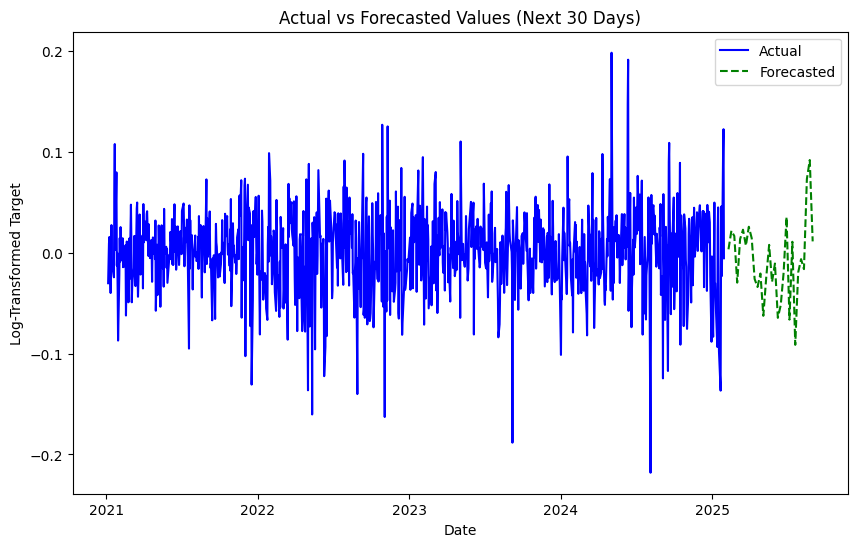

In [53]:
# Forecasting the next 30 days
forecast_steps = 30
y_pred_future = sarimax_results.predict(start=len(target_sarimax), 
                                        end=len(target_sarimax) + forecast_steps - 1, 
                                        exog=exog_features_scaled_log[-forecast_steps:])

# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(target_sarimax.index, target_sarimax, label='Actual', color='blue')
plt.plot(pd.date_range(target_sarimax.index[-1], periods=forecast_steps + 1, freq='W')[1:], y_pred_future, label='Forecasted', color='green', linestyle='--')
plt.title('Actual vs Forecasted Values (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Log-Transformed Target')
plt.legend()
plt.show()

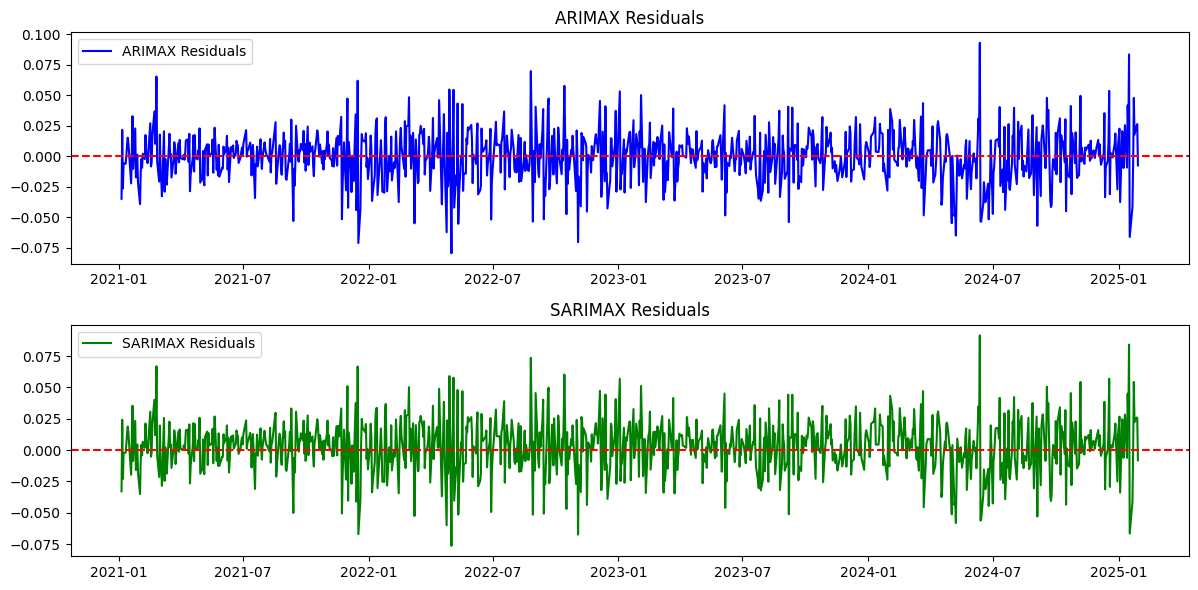

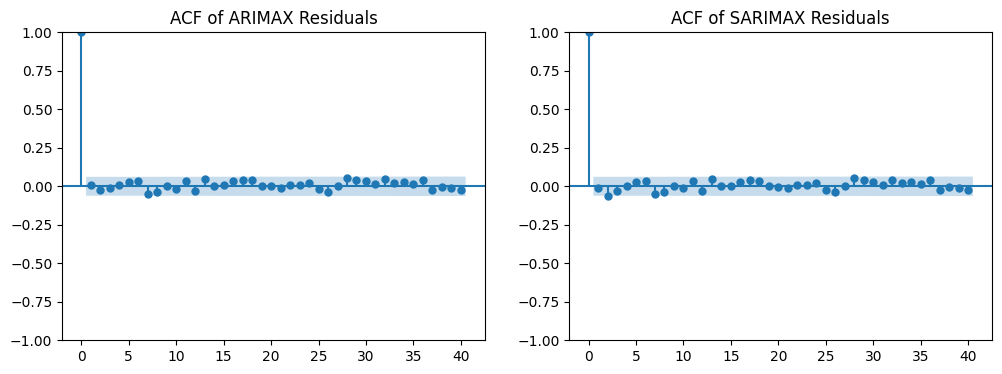

ARIMAX Forecast Error Metrics:
MAE: 0.025864367869748862, MSE: 0.0012473622743889845, RMSE: 0.03531801628615323, MAPE: 1.2408701683948928
SARIMAX Forecast Error Metrics:
MAE: 0.026256834203261345, MSE: 0.001259877231758183, RMSE: 0.03549474935477335, MAPE: 1.2899302953918093


In [54]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Residuals
arimax_residuals = arimax_result.resid
sarimax_residuals = sarimax_results.resid

# Plot ARIMAX & SARIMAX Residuals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(arimax_residuals, label='ARIMAX Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Zero line for reference
plt.title('ARIMAX Residuals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sarimax_residuals, label='SARIMAX Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('SARIMAX Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# ACF Plot for Residuals (Checking for remaining patterns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(arimax_residuals, lags=40, ax=axes[0])
axes[0].set_title('ACF of ARIMAX Residuals')

plot_acf(sarimax_residuals, lags=40, ax=axes[1])
axes[1].set_title('ACF of SARIMAX Residuals')

plt.show()

# Forecasting with both models
arimax_forecast = arimax_result.forecast(steps=30, exog=exog_future)
sarimax_forecast = sarimax_results.forecast(steps=30, exog=exog_future)

# Actual values for comparison
actual = target[-30:]

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# ARIMAX forecast error metrics
arimax_mae = mean_absolute_error(actual, arimax_forecast)
arimax_mse = mean_squared_error(actual, arimax_forecast)
arimax_rmse = np.sqrt(arimax_mse)
arimax_mape = mean_absolute_percentage_error(actual, arimax_forecast)

# SARIMAX forecast error metrics
sarimax_mae = mean_absolute_error(actual, sarimax_forecast)
sarimax_mse = mean_squared_error(actual, sarimax_forecast)
sarimax_rmse = np.sqrt(sarimax_mse)
sarimax_mape = mean_absolute_percentage_error(actual, sarimax_forecast)

# Print the comparison of performance metrics
print(f"ARIMAX Forecast Error Metrics:")
print(f"MAE: {arimax_mae}, MSE: {arimax_mse}, RMSE: {arimax_rmse}, MAPE: {arimax_mape}")
print(f"SARIMAX Forecast Error Metrics:")
print(f"MAE: {sarimax_mae}, MSE: {sarimax_mse}, RMSE: {sarimax_rmse}, MAPE: {sarimax_mape}")


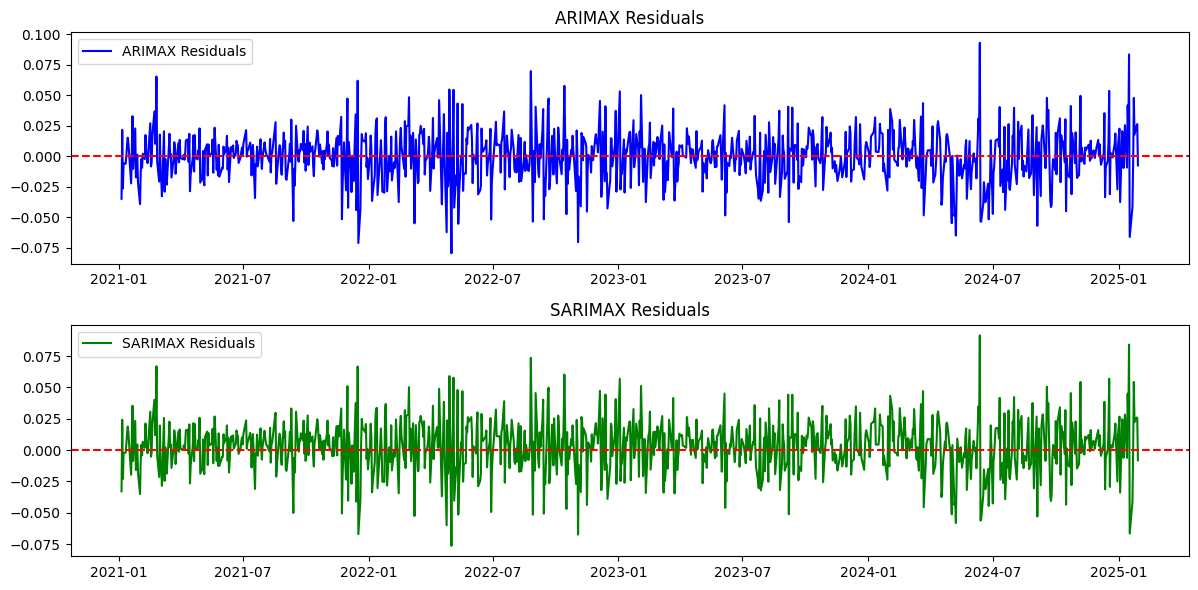

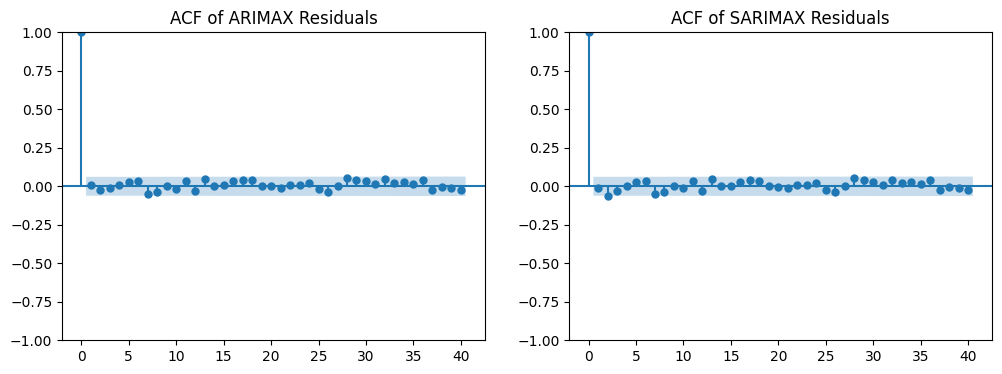

ARIMAX Forecast Error Metrics (Test):
MAE: 0.0259, MSE: 0.0012, RMSE: 0.0353, MAPE: 1.2409, R-squared: 0.6327
SARIMAX Forecast Error Metrics (Test):
MAE: 0.0263, MSE: 0.0013, RMSE: 0.0355, MAPE: 1.2899, R-squared: 0.6290

ARIMAX Forecast Error Metrics (Train):
MAE: 0.0156, MSE: 0.0004, RMSE: 0.0206, MAPE: 126553519585.7267, R-squared: 0.7403
SARIMAX Forecast Error Metrics (Train):
MAE: 0.0160, MSE: 0.0004, RMSE: 0.0210, MAPE: 117282920178.1245, R-squared: 0.7323


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Residuals
arimax_residuals = arimax_result.resid
sarimax_residuals = sarimax_results.resid

# Plot ARIMAX & SARIMAX Residuals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(arimax_residuals, label='ARIMAX Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Zero line for reference
plt.title('ARIMAX Residuals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sarimax_residuals, label='SARIMAX Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('SARIMAX Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# ACF Plot for Residuals (Checking for remaining patterns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(arimax_residuals, lags=40, ax=axes[0])
axes[0].set_title('ACF of ARIMAX Residuals')

plot_acf(sarimax_residuals, lags=40, ax=axes[1])
axes[1].set_title('ACF of SARIMAX Residuals')

plt.show()

# Forecasting with both models
exog_future = exog_features_scaled.iloc[-30:]  # Assuming you have this variable already
arimax_forecast = arimax_result.forecast(steps=30, exog=exog_future)
sarimax_forecast = sarimax_results.forecast(steps=30, exog=exog_future)

# Actual values for comparison (last 30 actual values)
actual = target[-30:]

# Calculate performance metrics for the test set (forecasted period)
# ARIMAX forecast error metrics
arimax_mae = mean_absolute_error(actual, arimax_forecast)
arimax_mse = mean_squared_error(actual, arimax_forecast)
arimax_rmse = np.sqrt(arimax_mse)
arimax_mape = mean_absolute_percentage_error(actual, arimax_forecast)
arimax_r2_test = r2_score(actual, arimax_forecast)  # R-squared for test data

# SARIMAX forecast error metrics
sarimax_mae = mean_absolute_error(actual, sarimax_forecast)
sarimax_mse = mean_squared_error(actual, sarimax_forecast)
sarimax_rmse = np.sqrt(sarimax_mse)
sarimax_mape = mean_absolute_percentage_error(actual, sarimax_forecast)
sarimax_r2_test = r2_score(actual, sarimax_forecast)  # R-squared for test data

# Print the comparison of performance metrics for test data
print(f"ARIMAX Forecast Error Metrics (Test):")
print(f"MAE: {arimax_mae:.4f}, MSE: {arimax_mse:.4f}, RMSE: {arimax_rmse:.4f}, MAPE: {arimax_mape:.4f}, R-squared: {arimax_r2_test:.4f}")
print(f"SARIMAX Forecast Error Metrics (Test):")
print(f"MAE: {sarimax_mae:.4f}, MSE: {sarimax_mse:.4f}, RMSE: {sarimax_rmse:.4f}, MAPE: {sarimax_mape:.4f}, R-squared: {sarimax_r2_test:.4f}")

# Train set predictions (using fitted values)
arimax_train_pred = arimax_result.fittedvalues  # Predicted values for the training data
sarimax_train_pred = sarimax_results.fittedvalues  # Predicted values for the training data
arimax_train_true = target.iloc[:len(arimax_train_pred)]  # Actual values for the training set
sarimax_train_true = target.iloc[:len(sarimax_train_pred)]  # Actual values for the training set

# Calculate performance metrics for the train set
# ARIMAX train error metrics
arimax_mae_train = mean_absolute_error(arimax_train_true, arimax_train_pred)
arimax_mse_train = mean_squared_error(arimax_train_true, arimax_train_pred)
arimax_rmse_train = np.sqrt(arimax_mse_train)
arimax_mape_train = mean_absolute_percentage_error(arimax_train_true, arimax_train_pred)
arimax_r2_train = r2_score(arimax_train_true, arimax_train_pred)  # R-squared for train data

# SARIMAX train error metrics
sarimax_mae_train = mean_absolute_error(sarimax_train_true, sarimax_train_pred)
sarimax_mse_train = mean_squared_error(sarimax_train_true, sarimax_train_pred)
sarimax_rmse_train = np.sqrt(sarimax_mse_train)
sarimax_mape_train = mean_absolute_percentage_error(sarimax_train_true, sarimax_train_pred)
sarimax_r2_train = r2_score(sarimax_train_true, sarimax_train_pred)  # R-squared for train data

# Print the comparison of performance metrics for train data
print(f"\nARIMAX Forecast Error Metrics (Train):")
print(f"MAE: {arimax_mae_train:.4f}, MSE: {arimax_mse_train:.4f}, RMSE: {arimax_rmse_train:.4f}, MAPE: {arimax_mape_train:.4f}, R-squared: {arimax_r2_train:.4f}")
print(f"SARIMAX Forecast Error Metrics (Train):")
print(f"MAE: {sarimax_mae_train:.4f}, MSE: {sarimax_mse_train:.4f}, RMSE: {sarimax_rmse_train:.4f}, MAPE: {sarimax_mape_train:.4f}, R-squared: {sarimax_r2_train:.4f}")

- SARIMAX slightly outperforms ARIMAX in this case, but both models provide a good fit for the dataset and show excellent forecast accuracy.
- Given these results, either model could be used for forecasting the target variable, though SARIMAX might be preferred due to its marginally better performance in terms of error metrics.

In summary, both models seem to fit well, and you can confidently use them for forecasting future values. However, SARIMAX offers a slightly more accurate prediction based on the provided error metrics.